In [1]:
#import jax.numpy as np
#from jax import pmap
import numpy as np
from maxnorm.maxnorm_completion import *
from maxnorm.tenalg import *
import sparse
from itertools import product

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%load_ext autoreload

In [2]:
%autoreload

In [3]:
# create random, low-rank tensor
t = 3
n = 200
r = 4
#delta = 0.1
const = 10
sigma = 0.1
ndata =  const * r * t * n * np.log10(n)
U = [np.random.randn(n, r) for i in range(t)]
print("n data: %.2e" % ndata)
print("n data t/2: %.2e" % int(const * r * n**(t/2) * np.log10(n)))

n data: 5.52e+04
n data t/2: 2.60e+05


In [4]:
max_qnorm_ub(U)

59.03881466119982

In [5]:
observation_mask = sparse.random(tuple([n for i in range(t)]), ndata * n**(-t))
data = observation_mask.copy()

clean_data = kr_get_items(U, data.coords)

#clean_data = np.array(list(map(get_item_coords, [data.coords[:, i] for i in range(data.nnz)])))

# for i in range(data.nnz):
#     pred = get_item(U, data.coords[:, i])
#     data.data[i] = pred
# clean_data = data.data

clean_data_rms = np.sqrt(np.sum(clean_data)**2 / len(clean_data))

data.data = clean_data + np.random.randn(data.nnz) * sigma
print(data.nnz)

55224


In [6]:
print(10* 400**(3/2))
print(10 * r * t * 400)

80000.0
48000


In [7]:
data.coords

array([[  0,   0,   0, ..., 199, 199, 199],
       [  0,   0,   2, ..., 199, 199, 199],
       [ 39,  99, 182, ..., 143, 155, 176]])

In [8]:
clean_data_rmse = np.sqrt(loss(U, data) / data.nnz)
delta = 2 * clean_data_rmse
#np.sqrt(np.sum((data.data - clean_data)**2)) * 2 / np.sqrt(data.nnz) * 1.5

print("rms of data:        %f" % clean_data_rms)
print("delta parameter:    %f" % delta)
print("rmse of U true:     %f" % np.sqrt(loss(U, data) / data.nnz))

/home/kameron/local/anaconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/home/kameron/local/anaconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.targets.imputils', please update to use 'numba.core.imputils' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/home/kameron/local/anaconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'impl_ret_borrowed' requested from: 'numba.targets.imputils', please u

rms of data:        1.875950
delta parameter:    0.200225
rmse of U true:     0.100112


In [9]:
# from tensorly.contrib.sparse.decomposition import parafac

# mask = data != 0
# core, factors = parafac(data, r, mask=mask, init='random', verbose=True, tol=1e-3, n_iter_max=8)
# scale_mat = np.diag(core.todense()**(1/t))
# U = [factors[i].todense() @ scale_mat for i in range(t)]

In [10]:
%autoreload
Unew2, cost_arr = tensor_completion_maxnorm(data, r*3, delta * np.sqrt(data.nnz),
                                            init='svdrand', kappa=100, beta=1, tol=1e-3, max_iter=100)

Initial cost: 8771720.841744
Initial qnorm_ub: 1.050046
|| r || = 1.982464, delta = 47.052430
Entering inner loop for factor 0
qnorm_factr = 1.045121
initial objective 8.771721e+06
iteration 30, objective 8.723e+06, relative change 2.855e-04        
maximum iteration 30 reached with relative change in objective function 0.00029
Entering inner loop for factor 1
qnorm_factr = 43.473467
initial objective 8.723442e+06
iteration 30, objective 8.362e+06, relative change 5.481e-04        
maximum iteration 30 reached with relative change in objective function 0.00055
Entering inner loop for factor 2
qnorm_factr = 174.486445
initial objective 8.362405e+06
iteration 30, objective 7.414e+06, relative change 6.274e-04        
maximum iteration 30 reached with relative change in objective function 0.00063

Iteration 0 complete


scaled || r || = 1.838730, delta = 0.200225
Max-qnorm upper bound: 189.882876
Cost function:         7.414e+06


Entering inner loop for factor 0
qnorm_factr = 4.493261
in


Iteration 8 complete


scaled || r || = 0.157213, delta = 0.200225
Max-qnorm upper bound: 176.627404
Cost function:         8.523e+02


Entering inner loop for factor 0
qnorm_factr = 2.564864
initial objective 8.523308e+02
iteration 30, objective 7.420e+02, relative change 1.461e-03        
maximum iteration 30 reached with relative change in objective function 0.0015
Entering inner loop for factor 1
qnorm_factr = 60.065529
initial objective 7.420394e+02
iteration 30, objective 5.390e+02, relative change 5.374e-03        
maximum iteration 30 reached with relative change in objective function 0.0054
Entering inner loop for factor 2
qnorm_factr = 143.059100
initial objective 5.389741e+02
iteration 30, objective 5.020e+02, relative change 3.246e-04        
maximum iteration 30 reached with relative change in objective function 0.00032

Iteration 9 complete


scaled || r || = 0.116962, delta = 0.200225
Max-qnorm upper bound: 128.030493
Cost function:         5.020e+02


Entering inner lo

iteration 30, objective 3.372e+02, relative change 2.107e-04        
maximum iteration 30 reached with relative change in objective function 0.00021
Entering inner loop for factor 1
qnorm_factr = 52.774257
initial objective 3.372189e+02
iteration 30, objective 3.367e+02, relative change 4.993e-05        
maximum iteration 30 reached with relative change in objective function 5e-05
Entering inner loop for factor 2
qnorm_factr = 97.962766
initial objective 3.366744e+02
iteration 30, objective 3.363e+02, relative change 2.677e-05        
maximum iteration 30 reached with relative change in objective function 2.7e-05

Iteration 18 complete


scaled || r || = 0.095645, delta = 0.200225
Max-qnorm upper bound: 86.211582
Cost function:         3.363e+02


Entering inner loop for factor 0
qnorm_factr = 1.438249
initial objective 3.363035e+02
iteration 30, objective 3.350e+02, relative change 2.083e-04        
maximum iteration 30 reached with relative change in objective function 0.00021
Enteri

iteration 30, objective 3.249e+02, relative change 8.549e-05        
maximum iteration 30 reached with relative change in objective function 8.5e-05
Entering inner loop for factor 1
qnorm_factr = 48.985118
initial objective 3.249327e+02
iteration 3, objective 3.249e+02, relative change 9.791e-06        
relative change in objective function 9.8e-06 is within tolerance 1e-05 after 3 iterations
Entering inner loop for factor 2
qnorm_factr = 90.460245
initial objective 3.248955e+02
iteration 3, objective 3.249e+02, relative change 7.196e-06        
relative change in objective function 7.2e-06 is within tolerance 1e-05 after 3 iterations

Iteration 27 complete


scaled || r || = 0.094741, delta = 0.200225
Max-qnorm upper bound: 79.466597
Cost function:         3.249e+02


Entering inner loop for factor 0
qnorm_factr = 1.425239
initial objective 3.248563e+02
iteration 30, objective 3.244e+02, relative change 8.498e-05        
maximum iteration 30 reached with relative change in objective f

iteration 30, objective 3.196e+02, relative change 8.200e-05        
maximum iteration 30 reached with relative change in objective function 8.2e-05
Entering inner loop for factor 1
qnorm_factr = 46.805872
initial objective 3.195677e+02
iteration 3, objective 3.195e+02, relative change 8.475e-06        
relative change in objective function 8.5e-06 is within tolerance 1e-05 after 3 iterations
Entering inner loop for factor 2
qnorm_factr = 85.975601
initial objective 3.195381e+02
iteration 2, objective 3.195e+02, relative change 8.317e-06        
relative change in objective function 8.3e-06 is within tolerance 1e-05 after 2 iterations

Iteration 36 complete


scaled || r || = 0.094481, delta = 0.200225
Max-qnorm upper bound: 75.467659
Cost function:         3.195e+02


Entering inner loop for factor 0
qnorm_factr = 1.415372
initial objective 3.195118e+02
iteration 30, objective 3.191e+02, relative change 8.150e-05        
maximum iteration 30 reached with relative change in objective f

iteration 30, objective 3.151e+02, relative change 6.881e-05        
maximum iteration 30 reached with relative change in objective function 6.9e-05
Entering inner loop for factor 1
qnorm_factr = 44.837469
initial objective 3.151141e+02
iteration 3, objective 3.151e+02, relative change 8.235e-06        
relative change in objective function 8.2e-06 is within tolerance 1e-05 after 3 iterations
Entering inner loop for factor 2
qnorm_factr = 81.989905
initial objective 3.150903e+02
iteration 2, objective 3.151e+02, relative change 7.231e-06        
relative change in objective function 7.2e-06 is within tolerance 1e-05 after 2 iterations

Iteration 45 complete


scaled || r || = 0.094306, delta = 0.200225
Max-qnorm upper bound: 71.932192
Cost function:         3.151e+02


Entering inner loop for factor 0
qnorm_factr = 1.407554
initial objective 3.150715e+02
iteration 30, objective 3.147e+02, relative change 6.070e-05        
maximum iteration 30 reached with relative change in objective f

iteration 1, objective 3.145e+02, relative change 9.578e-06        
relative change in objective function 9.6e-06 is within tolerance 1e-05 after 1 iterations
Entering inner loop for factor 1
qnorm_factr = 44.615086
initial objective 3.144605e+02
iteration 2, objective 3.144e+02, relative change 9.523e-06        
relative change in objective function 9.5e-06 is within tolerance 1e-05 after 2 iterations
Entering inner loop for factor 2
qnorm_factr = 81.489968
initial objective 3.144469e+02
iteration 2, objective 3.144e+02, relative change 5.778e-06        
relative change in objective function 5.8e-06 is within tolerance 1e-05 after 2 iterations

Iteration 54 complete


scaled || r || = 0.094279, delta = 0.200225
Max-qnorm upper bound: 71.434334
Cost function:         3.144e+02


Entering inner loop for factor 0
qnorm_factr = 1.403681
initial objective 3.144355e+02
iteration 1, objective 3.144e+02, relative change 9.613e-06        
relative change in objective function 9.6e-06 is within

iteration 1, objective 3.142e+02, relative change 9.856e-06        
relative change in objective function 9.9e-06 is within tolerance 1e-05 after 1 iterations
Entering inner loop for factor 1
qnorm_factr = 44.569369
initial objective 3.142279e+02
iteration 2, objective 3.142e+02, relative change 9.760e-06        
relative change in objective function 9.8e-06 is within tolerance 1e-05 after 2 iterations
Entering inner loop for factor 2
qnorm_factr = 81.334708
initial objective 3.142162e+02
iteration 2, objective 3.142e+02, relative change 5.182e-06        
relative change in objective function 5.2e-06 is within tolerance 1e-05 after 2 iterations

Iteration 63 complete


scaled || r || = 0.094272, delta = 0.200225
Max-qnorm upper bound: 71.242978
Cost function:         3.142e+02


Entering inner loop for factor 0
qnorm_factr = 1.400254
initial objective 3.142074e+02
iteration 1, objective 3.142e+02, relative change 9.877e-06        
relative change in objective function 9.9e-06 is within

iteration 1, objective 3.140e+02, relative change 9.974e-06        
relative change in objective function 1e-05 is within tolerance 1e-05 after 1 iterations
Entering inner loop for factor 1
qnorm_factr = 44.528402
initial objective 3.140261e+02
iteration 2, objective 3.140e+02, relative change 9.630e-06        
relative change in objective function 9.6e-06 is within tolerance 1e-05 after 2 iterations
Entering inner loop for factor 2
qnorm_factr = 81.187159
initial objective 3.140157e+02
iteration 2, objective 3.140e+02, relative change 4.834e-06        
relative change in objective function 4.8e-06 is within tolerance 1e-05 after 2 iterations

Iteration 72 complete


scaled || r || = 0.094268, delta = 0.200225
Max-qnorm upper bound: 71.065690
Cost function:         3.140e+02


Entering inner loop for factor 0
qnorm_factr = 1.397096
initial objective 3.140082e+02
iteration 1, objective 3.140e+02, relative change 9.974e-06        
relative change in objective function 1e-05 is within tol

iteration 1, objective 3.138e+02, relative change 9.931e-06        
relative change in objective function 9.9e-06 is within tolerance 1e-05 after 1 iterations
Entering inner loop for factor 1
qnorm_factr = 44.491091
initial objective 3.138425e+02
iteration 2, objective 3.138e+02, relative change 9.098e-06        
relative change in objective function 9.1e-06 is within tolerance 1e-05 after 2 iterations
Entering inner loop for factor 2
qnorm_factr = 81.058331
initial objective 3.138329e+02
iteration 2, objective 3.138e+02, relative change 4.582e-06        
relative change in objective function 4.6e-06 is within tolerance 1e-05 after 2 iterations

Iteration 81 complete


scaled || r || = 0.094263, delta = 0.200225
Max-qnorm upper bound: 70.910413
Cost function:         3.138e+02


Entering inner loop for factor 0
qnorm_factr = 1.394366
initial objective 3.138261e+02
iteration 1, objective 3.138e+02, relative change 9.924e-06        
relative change in objective function 9.9e-06 is within

iteration 1, objective 3.137e+02, relative change 9.859e-06        
relative change in objective function 9.9e-06 is within tolerance 1e-05 after 1 iterations
Entering inner loop for factor 1
qnorm_factr = 44.456968
initial objective 3.136713e+02
iteration 2, objective 3.137e+02, relative change 8.680e-06        
relative change in objective function 8.7e-06 is within tolerance 1e-05 after 2 iterations
Entering inner loop for factor 2
qnorm_factr = 80.939226
initial objective 3.136624e+02
iteration 2, objective 3.137e+02, relative change 4.382e-06        
relative change in objective function 4.4e-06 is within tolerance 1e-05 after 2 iterations

Iteration 90 complete


scaled || r || = 0.094257, delta = 0.200225
Max-qnorm upper bound: 70.768597
Cost function:         3.137e+02


Entering inner loop for factor 0
qnorm_factr = 1.391896
initial objective 3.136561e+02
iteration 1, objective 3.137e+02, relative change 9.850e-06        
relative change in objective function 9.8e-06 is within

iteration 1, objective 3.135e+02, relative change 9.774e-06        
relative change in objective function 9.8e-06 is within tolerance 1e-05 after 1 iterations
Entering inner loop for factor 1
qnorm_factr = 44.425489
initial objective 3.135101e+02
iteration 2, objective 3.135e+02, relative change 8.315e-06        
relative change in objective function 8.3e-06 is within tolerance 1e-05 after 2 iterations
Entering inner loop for factor 2
qnorm_factr = 80.827201
initial objective 3.135017e+02
iteration 2, objective 3.135e+02, relative change 4.218e-06        
relative change in objective function 4.2e-06 is within tolerance 1e-05 after 2 iterations

Iteration 99 complete


scaled || r || = 0.094252, delta = 0.200225
Max-qnorm upper bound: 70.637075
Cost function:         3.135e+02




In [11]:
#print("loss of U parafac:  %f" % np.sqrt(loss(U,data) / data.nnz))
print("loss of U true:     %f" % np.sqrt(loss(U, data) / data.nnz))
print("loss of U max:      %f" % np.sqrt(loss(Unew2, data) / data.nnz))

loss of U true:     0.100112
loss of U max:      0.094252


Text(0, 0.5, 'cost')

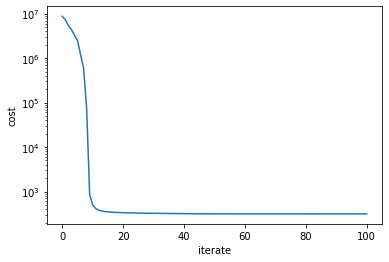

In [12]:
import matplotlib.pyplot as plt

plt.semilogy(cost_arr)
plt.xlabel('iterate')
plt.ylabel('cost')

## Generalization error

In [13]:
mse_gen2 = kr_dot(Unew2,Unew2) + kr_dot(U,U) - 2 * kr_dot(Unew2, U)
norm_true = kr_dot(U,U)
print("relative RMSE: %1.4e" % np.sqrt(mse_gen2/norm_true))

relative RMSE: 3.0500e-02


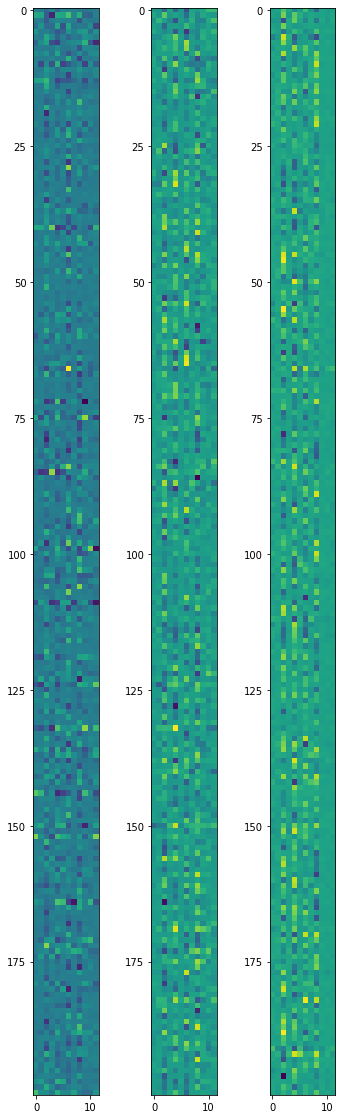

In [14]:
fig, axs = plt.subplots(1,t, figsize=(6, 20))
for i in range(t):
    axs[i].imshow(Unew2[i])